In [1]:
cd ..

/home/mescalin/htyao/Projects/VIECPLX


/home/mescalin/htyao/micromamba/envs/parnassus/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

In [29]:
from src.foldingAlg import Final_list, LookBehindFold, ViennaFold, BestHelixFoldRNAFold, BasicCoFold

In [14]:
foldingNames = [x.name for x in Final_list]
print(*foldingNames, sep=', ')
toplot = [x.name for x in Final_list]
labels = toplot[:]
labels[3] = 'Best helix cofold'

RNAfold, Look behind fold, Basic cofold, Best helix cofold with RNAfold in second step, Folding rule, Beam search


In [6]:
SHAPE_DIR = Path('result/shape_freq/')

In [24]:
def to_df(t):
    df = pd.read_csv(t, sep='\t', names=['seq', 'shape', 'dbn'])
    df.loc[:, 'folding'] = t.stem.split('_')[-1]
    return df

df = pd.concat([to_df(t) for t in SHAPE_DIR.iterdir() if t.suffix == '.csv' and t.stem.split('_')[-1] in foldingNames])
# df.loc[:, 'shape_I'] = df['shape'].str.replace('B', 'I')
df

,seq,shape,dbn,folding
0,UCGUAUUCCCCUCUGUCCCUAGACUCCUACUGGAAACCAUAGUCAA...,(((((((H)I)I)I)((H)B)M)B)(H)R),.......((((((((((......(((...(((((.((....))......,RNAfold
1,CUUGAUUCAGUUAUGAUAAUAGGAAGAACGCACUACAGAUUUGGAA...,(((H)I)(((((H)I)B)I)I)R),((((..(((....)))...)))).............((.((((((....,RNAfold
2,GUUCGGCAGGGCCGGGGAGAAAUGUGGGAACGUUGCUGAUCGAGGG...,((H)(H)(((H)I)I)((H)I)(H)R),.((((((...))))))....(((((....))))).((.(((((.(....,RNAfold
3,UCCUCCUCACUUUGGGGUAAACUCCCAUCUGCGCUAAAAGACUCAC...,((H)((H)(((H)I)I)M)R),..((((.......)))).....((((((((........))).(((....,RNAfold
4,CGGGACGGUGCGUCCAACUCCCUGCUUUCAACACUUACCACUACCU...,(((H)I)(H)((((H)B)I)B)R),.((((.((.....))...))))(((........................,RNAfold
...,...,...,...,...
99995,AUCUGCAGGAGGUCUAUCGGCCUCCCCCUUUAAAAAUAGGGCUCCG...,((H)(H)(H)(H)(H)(H)R),.(((...)))((((....)))).....(((((....)))))...((...,Look behind fold
99996,GGCGCGAUCACAGAAGUCUUUUAAUGUUCUUCGUCAGAGCGCAUAC...,((H)(H)(H)(H)(H)R),(((............))).....(((.....)))...........(...,Look behind fold
99997,CUGUAGACGGGGGGGGAGGGCCUGCAGACGCAUGGUUUAGAGGGCU...,((H)(H)(H)(H)(H)(H)(H)R),(((....)))(((.......)))..((((.....)))).......(...,Look behind fold
99998,ACUCUCUGUCCAUCGGAUCUCGGAUCAAGGCUGCAGAAUCAGUCCU...,((H)(H)(H)(H)(H)(H)R),....((((.....))))...(((.......)))((((........)...,Look behind fold


In [28]:
corrects = {k.name: 0 for k in Final_list}

for seq in np.unique(df['seq']):
    tmp = df[df['seq']==seq]
    truth = tmp.loc[tmp['folding']=='RNAfold' ,'shape'].to_list()[0]
    for k in Final_list:
        shape = tmp.loc[tmp['folding']==k.name ,'shape'].to_list()[0]
        corrects[k.name] += shape == truth
print(corrects)

{'RNAfold': 100000, 'Look behind fold': 7, 'Basic cofold': 333, 'Best helix cofold with RNAfold in second step': 14921, 'Folding rule': 11507, 'Beam search': 31180}


In [ ]:
for k in Final_list:
    print(k.name, )

In [10]:
shapes = {k.name: set(np.unique(df.loc[df['folding']==k.name, 'shape'])) for k in Final_list}

In [11]:
for k, v in shapes.items():
    if k == 'RNAfold':
        print(k, len(v))
        continue
    print(k, len(shapes['RNAfold'] & v), len(v))

RNAfold 15288
Look behind fold 3 6
Basic cofold 679 693
Best helix cofold with RNAfold in second step 8169 10987
Folding rule 5238 6172
Beam search 9941 14557


In [12]:
# Convert df to count object
shape_counter = {k: Counter(df.loc[df['folding']==k.name, 'shape'].to_list()) for k in Final_list}

Plot shape frequency plot in separate order

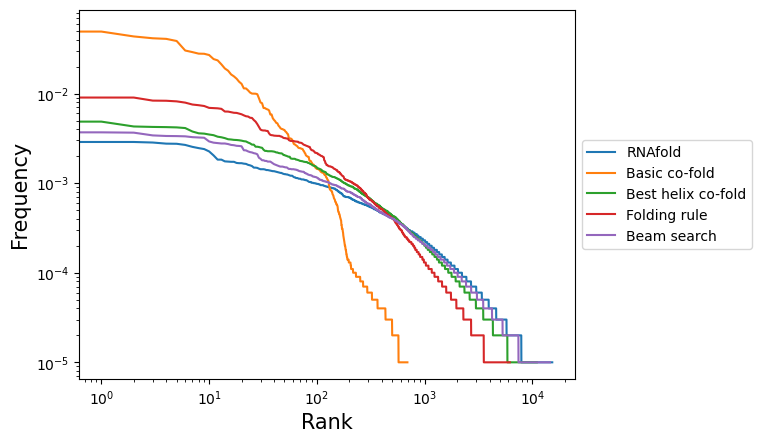

In [30]:
for folding in Final_list:
    if folding == LookBehindFold:
        continue
    count = shape_counter[folding]
    t = count.total()
    if folding == BestHelixFoldRNAFold:
        label = "Best helix co-fold"
    elif folding == BasicCoFold:
        label = "Basic co-fold"
    else:
        label = folding.name
    plt.plot([x[1]/t for x in count.most_common()], label=label)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Rank', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xscale('log')
plt.yscale('log')
plt.savefig('doc/fig/shapefreq_all.pdf', dpi=200, bbox_inches='tight')

Plot shape frequency plot in order of RNAfold

/tmp/ipykernel_2670170/2908324647.py:31: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0, 0.01)


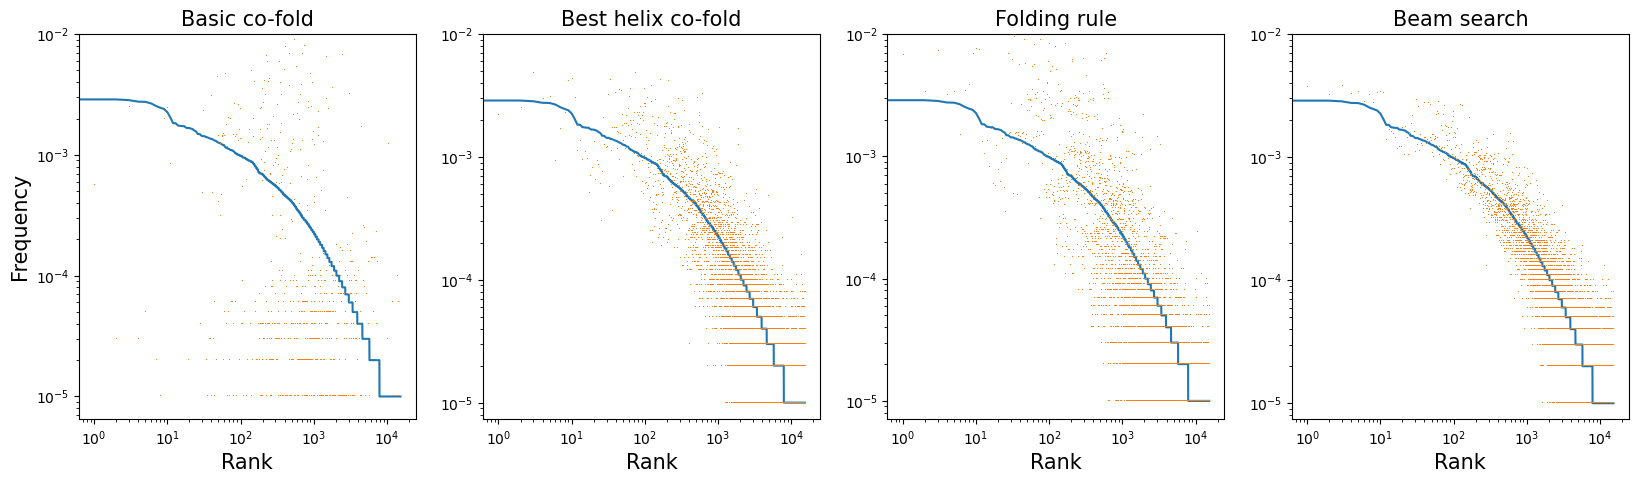

In [31]:
# RNAFold rank
t = count.total()
order = [x[0] for x in shape_counter[ViennaFold].most_common()]
rank = [x[1]/t for x in shape_counter[ViennaFold].most_common()]

to_plot_folding = [x for x in Final_list if not x in [ViennaFold, LookBehindFold]]
l = len(to_plot_folding)
# w = (l+1)//2
fig, axs = plt.subplots(1, l, figsize=(20, 5))
for i, folding in enumerate(to_plot_folding):
    ax = fig.axes[i]
    count = shape_counter[folding]
    # Plot RNAfold shape rank
    ax.plot(rank)
    # Plot folding shape rank
    ax.plot([count[x]/t for x in order], ',')
    
    if folding == BestHelixFoldRNAFold:
        ax.set_title("Best helix co-fold", fontsize=15)
    elif folding == BasicCoFold:
        ax.set_title("Basic co-fold", fontsize=15)
    else:
        ax.set_title(folding.name, fontsize=15)
    ax.set_xlabel('Rank', fontsize=15)
    if i == 0:
        ax.set_ylabel('Frequency', fontsize=15)
    else:
        ax.set(ylabel=None)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0, 0.01)
plt.savefig('doc/fig/shapefreq_rnafold.pdf', dpi=200, bbox_inches='tight')